In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df=pd.read_csv('50_Startups.csv')

In [19]:
df.shape

(50, 5)

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['State']=LE.fit_transform(df['State'])

In [24]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


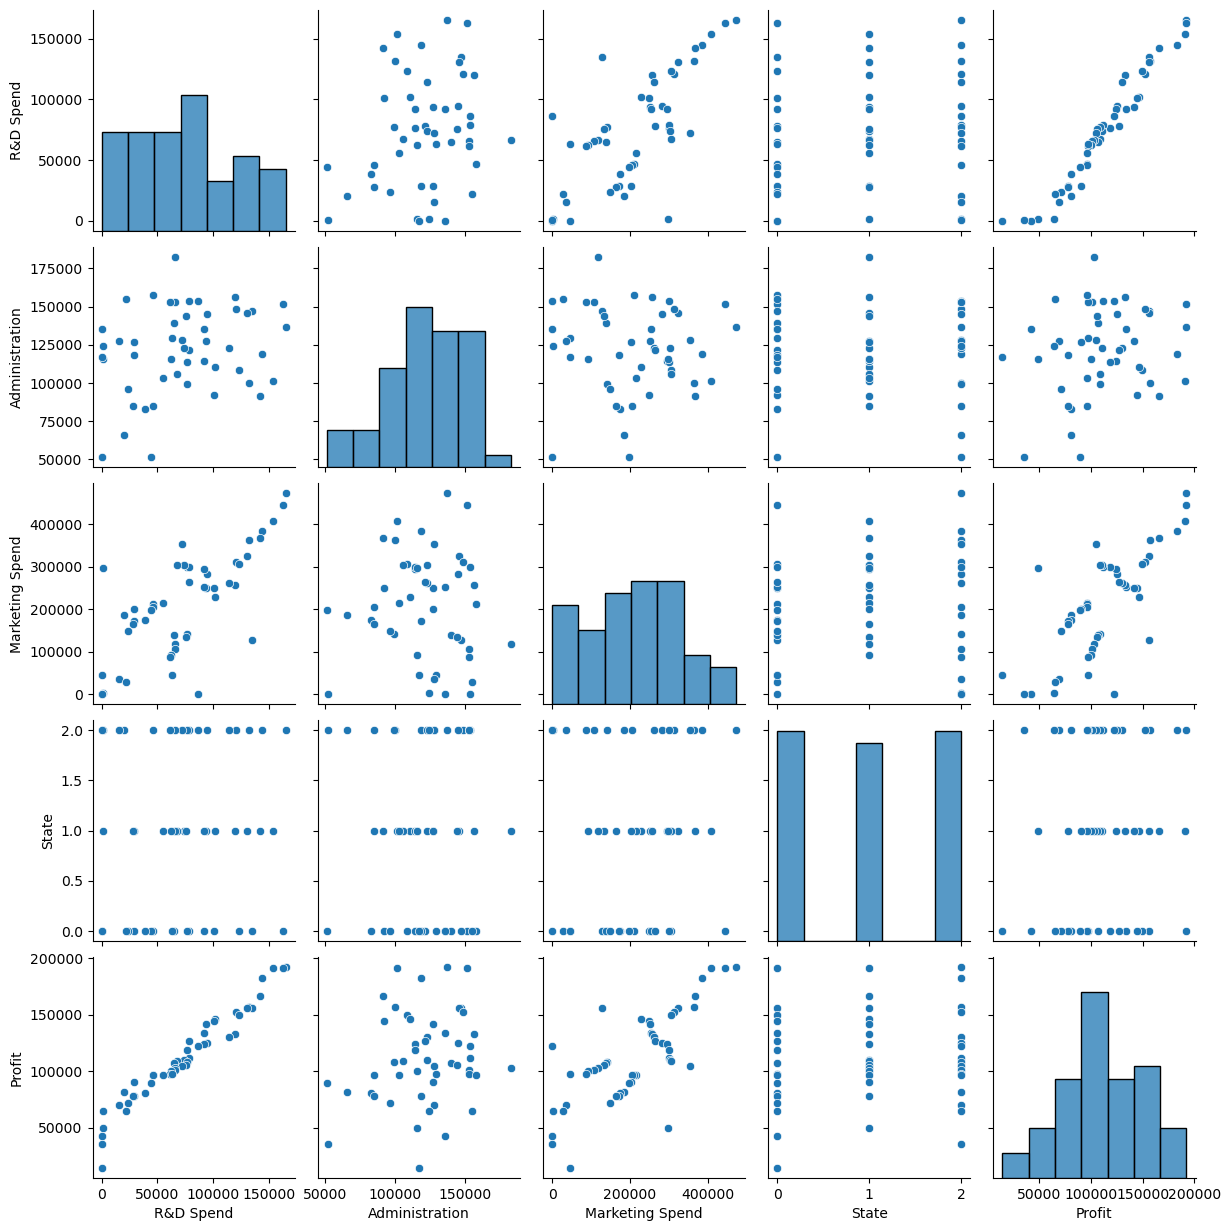

In [25]:
sns.pairplot(data=df)

In [26]:
# states and Administrative columns are not affecting the profits. They are not useful in determinijgn hte profits for the company

In [27]:
df.drop(columns=['State','Administration'],inplace=True)

In [28]:
df.head(2)

,R&D Spend,Marketing Spend,Profit
0,165349.2,471784.10,192261.83
1,162597.7,443898.53,191792.06


<Axes: xlabel='R&D Spend', ylabel='Profit'>

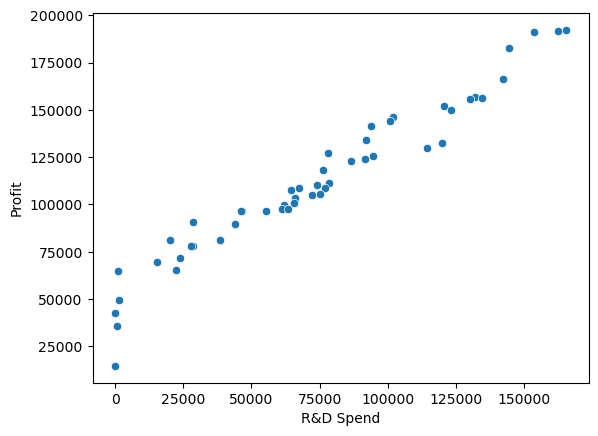

In [29]:
sns.scatterplot(data=df,x='R&D Spend' ,y='Profit')

# higher we spend on R & d higher profits are expected

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

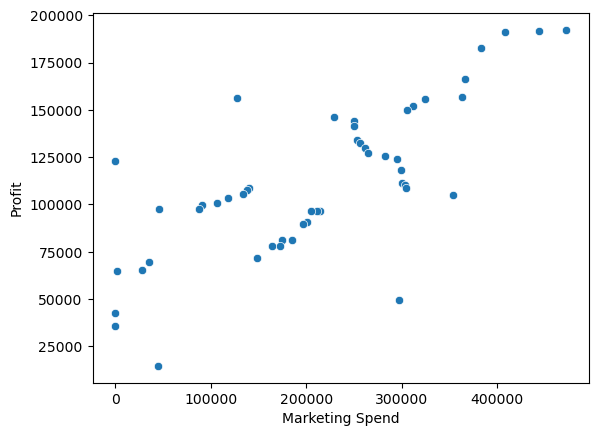

In [30]:
sns.scatterplot(data=df,x='Marketing Spend' ,y='Profit')

In [33]:
df.describe()

,R&D Spend,Marketing Spend,Profit
count,50.000000,50.000000,50.000000
mean,73721.615600,211025.097800,112012.639200
std,45902.256482,122290.310726,40306.180338
min,0.000000,0.000000,14681.400000
25%,39936.370000,129300.132500,90138.902500
50%,73051.080000,212716.240000,107978.190000
75%,101602.800000,299469.085000,139765.977500
max,165349.200000,471784.100000,192261.830000


In [36]:
x=df[['R&D Spend','Marketing Spend']]
y=df['Profit']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
LR=LinearRegression(n_jobs=-1)
LR.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

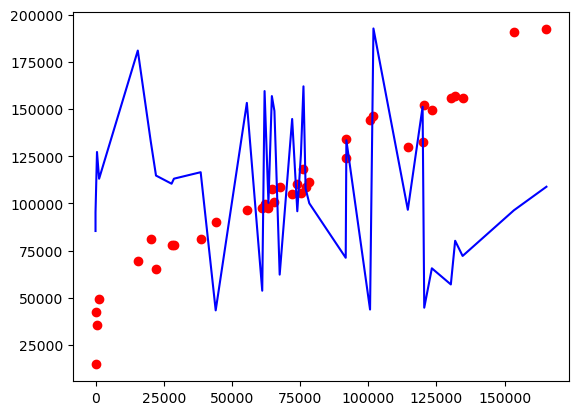

In [52]:
plt.scatter(x_train['R&D Spend'], y_train, color='red')
new_data=np.sort(x_train['R&D Spend'])
plt.plot(new_data, LR.predict(x_train), color='blue')
plt.show()

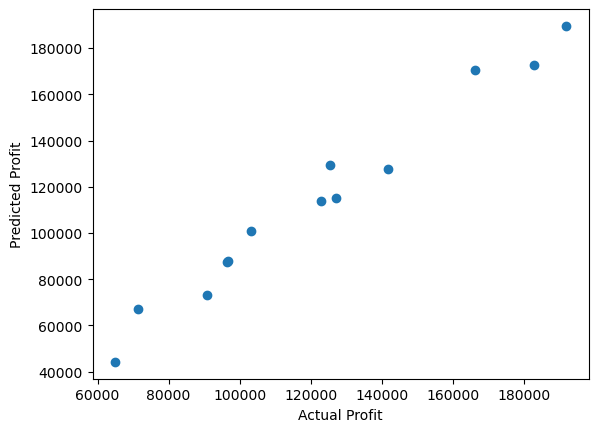

In [50]:
plt.scatter(y_test, LR.predict(x_test))
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


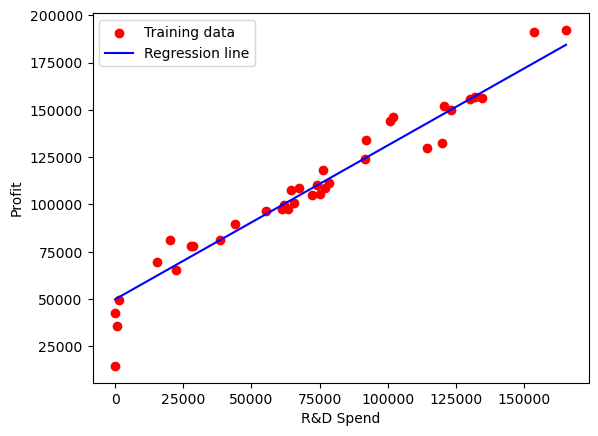

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x_sorted = np.sort(x_train['R&D Spend'])
X_line = np.column_stack([x_sorted, np.full_like(x_sorted, x_train['Marketing Spend'].mean())])
y_line = LR.predict(X_line)
plt.scatter(x_train['R&D Spend'], y_train, color='red', label='Training data')
plt.plot(x_sorted, y_line, color='blue', label='Regression line')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.legend()
plt.show()